# Ejemplo 1. Perceptrón scikit-learn 

En este ejemplo se implementa el Perceptrón de la biblioteca **scikit-learn** en el conjunto de datos Iris

[Documentación Perceptrón](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)

In [1]:
import numpy as np

from matplotlib.colors import ListedColormap 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

Scikit-Learn incluye unas serie de conjuntos de datos estándar para realuzar experimentación sin necesidad de descagar algúna archivo. En este ejemplo se utiliza el conjunto de datos `iris`.



In [2]:
iris = load_iris()

In [3]:
print(iris['DESCR'][:])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

De acuerdo a la descripción el conjunto de datos contiene tres tipos de flores (clases):

Para simplificar este ejemplo, solo se utilizan dos características y dos primeras clases:

In [4]:
X = iris.data[:100, (2,3)]
y = iris.target[:100]

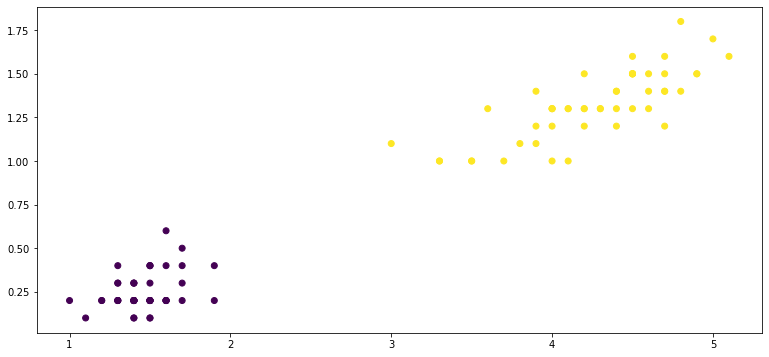

In [5]:
plt.figure(figsize = (13,6))
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

In [6]:
ppn = Perceptron()
ppn.fit(X, y)

Perceptron()

In [7]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, 
                edgecolor='black')
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', edgecolor='black', alpha=1.0, linewidth=1, marker='o',
                       s=100, label='test set')

<function matplotlib.pyplot.show(close=None, block=None)>

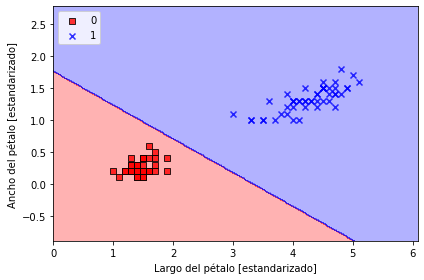

In [8]:
#X_combined_std = np.vstack((X_train_std, X_test_std))
#y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X = X, y = y, classifier = ppn)
plt.xlabel('Largo del pétalo [estandarizado]')
plt.ylabel('Ancho del pétalo [estandarizado]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show

Ahora que el modelo esta entrenado, es posible  realizar predicciones con datos nuevos. Por ejemplo, para una flor de iris que sea recolectada.

In [9]:
y1 = ppn.predict([[5.1, 2]])
print(y1)

[1]


In [10]:
y2 = ppn.predict([[1.4, 0.2]])
print(y2)

[0]


¿Se puede confiar en estas predicciones?